In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import itertools

asset_classes = ['SPY', 'GLD', 'TLT', '^VIX', 'CL']

dfs = []
for asset_class in asset_classes:
    filename = "C:/Users/hsahn/Downloads/"+asset_class+".csv"
    df = pd.read_csv(filename, usecols=['Date', 'Adj Close'], parse_dates=['Date'], dayfirst=True)
    df = df.rename(columns={'Adj Close': f'{asset_class}'})
    dfs.append(df)
    
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='Date', how='inner')

merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d-%m-%Y')
merged_df.to_csv('Merged Close.csv', index=False)


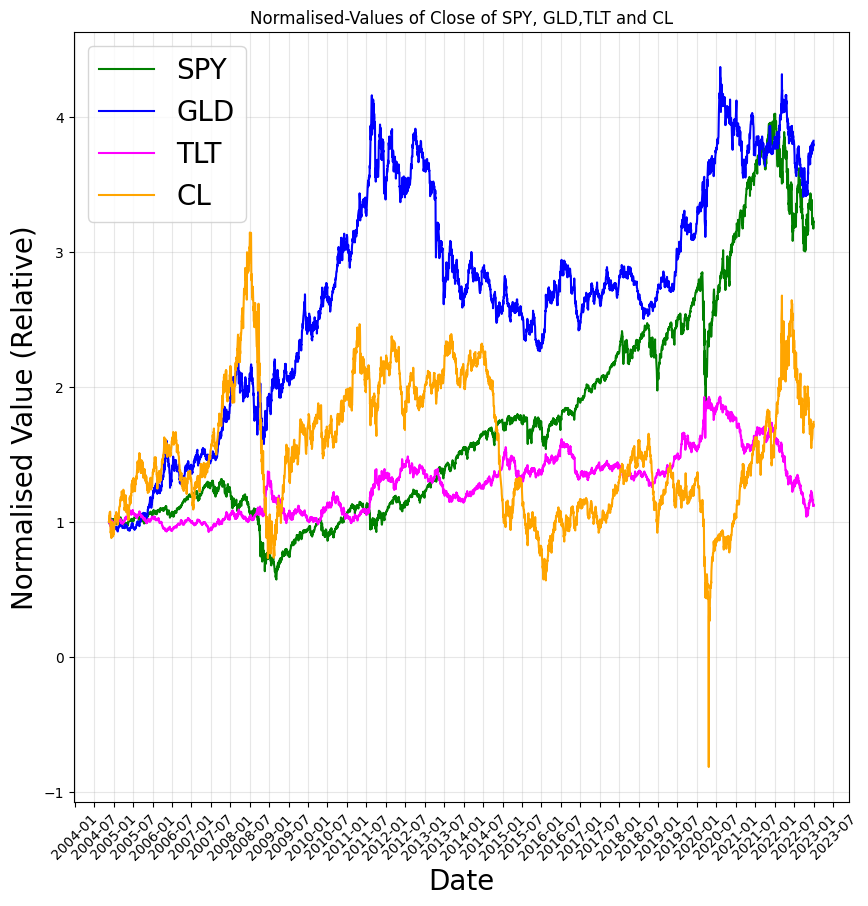

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.dates import MonthLocator, DateFormatter

merged_df = pd.read_csv("C:/Users/hsahn/Downloads/merged.csv", parse_dates=['Date'], dayfirst=True)


normal_df = merged_df.copy()
normal_df.drop(['FinQuarter'],inplace=True, axis=1)
for col in normal_df.columns[1:]:
    
    normal_df[col] = pd.to_numeric(normal_df[col], errors='raise')
    normal_df[col] = normal_df[col] / normal_df[col][0]


x = normal_df['Date']
SPY_values = normal_df['SPY']
GLD_values=normal_df['GLD']
Tlt_values=normal_df['TLT']
CL_values = normal_df['CL']


mpl.rcParams['figure.figsize'] = [10.0,10.0]
mpl.rcParams['font.size'] = 10.0
mpl.rcParams['axes.labelsize'] = 20.0
mpl.rcParams['legend.fontsize'] = 20.0


plt.plot(x, SPY_values, color='green')
plt.plot(x, GLD_values,color='blue')
plt.plot(x, Tlt_values,color='magenta')
plt.plot(x, CL_values, color='orange')


plt.xlabel('Date')
plt.ylabel('Normalised Value (Relative)')
plt.title('Normalised-Values of Close of SPY, GLD,TLT and CL')
plt.legend(['SPY', 'GLD', 'TLT', 'CL'], loc='upper left')

months = MonthLocator(interval=6)
date_format = DateFormatter('%Y-%m')
ax = plt.gca()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)


plt.grid(alpha=0.3)


plt.show()

In [3]:
import datetime as dt
from datetime import timedelta as td
import pandas as pd
import numpy as np 
from datetime import date

def DRAWDOWN_DURATION(name, starttime, endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) 
    new_df = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')    

    prevmaxdate = stock_data.index[0]
    maxnumberofdays = 0
    startdate = prevmaxdate
    enddate = prevmaxdate
    maxclose = float('-inf')

    for i in range(len(stock_data)):
        date = stock_data.index[i]
        close = stock_data.iloc[i]['Adj Close']
        if close > maxclose:
            maxclose = close
            prevmaxdate = date
        else:
            daysdiff = (date - prevmaxdate).days
            if daysdiff > maxnumberofdays:
                maxnumberofdays = daysdiff
                startdate = prevmaxdate
                enddate = date

    return startdate, enddate, maxnumberofdays

In [4]:
def DRAWDOWN_PERCENT(name, starttime, endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime, dayfirst=True)
    end_date = pd.to_datetime(endtime, dayfirst=True)
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    new_df = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    df1 = df.loc[new_df]
    stock_data = df1.reset_index(drop=True)

    window_size = 252
    max_drawdown = 0
    max_drawdown_start = None
    max_drawdown_end = None

    for i in range(len(stock_data) - window_size):
        current_window = stock_data.iloc[i:i + window_size]
        current_peak_idx = current_window['Adj Close'].idxmax()
        current_peak_value = current_window.loc[current_peak_idx, 'Adj Close']
        current_trough_idx = current_window.loc[current_peak_idx:]['Adj Close'].idxmin()
        current_trough_value = current_window.loc[current_trough_idx, 'Adj Close']

        drawdown = (current_peak_value - current_trough_value) / current_peak_value

        if drawdown > max_drawdown:
            max_drawdown = drawdown
            max_drawdown_start = stock_data.loc[current_peak_idx, 'Date']
            max_drawdown_end = stock_data.loc[current_trough_idx, 'Date']

    return max_drawdown_start, max_drawdown_end, max_drawdown * 100

0     1967-10-01
1     1968-01-01
2     1968-04-01
3     1968-07-01
4     1968-10-01
         ...    
341   2022-11-03
342   2022-11-04
343   2022-11-05
344   2022-11-06
345   2022-11-07
Name: Date, Length: 346, dtype: datetime64[ns]


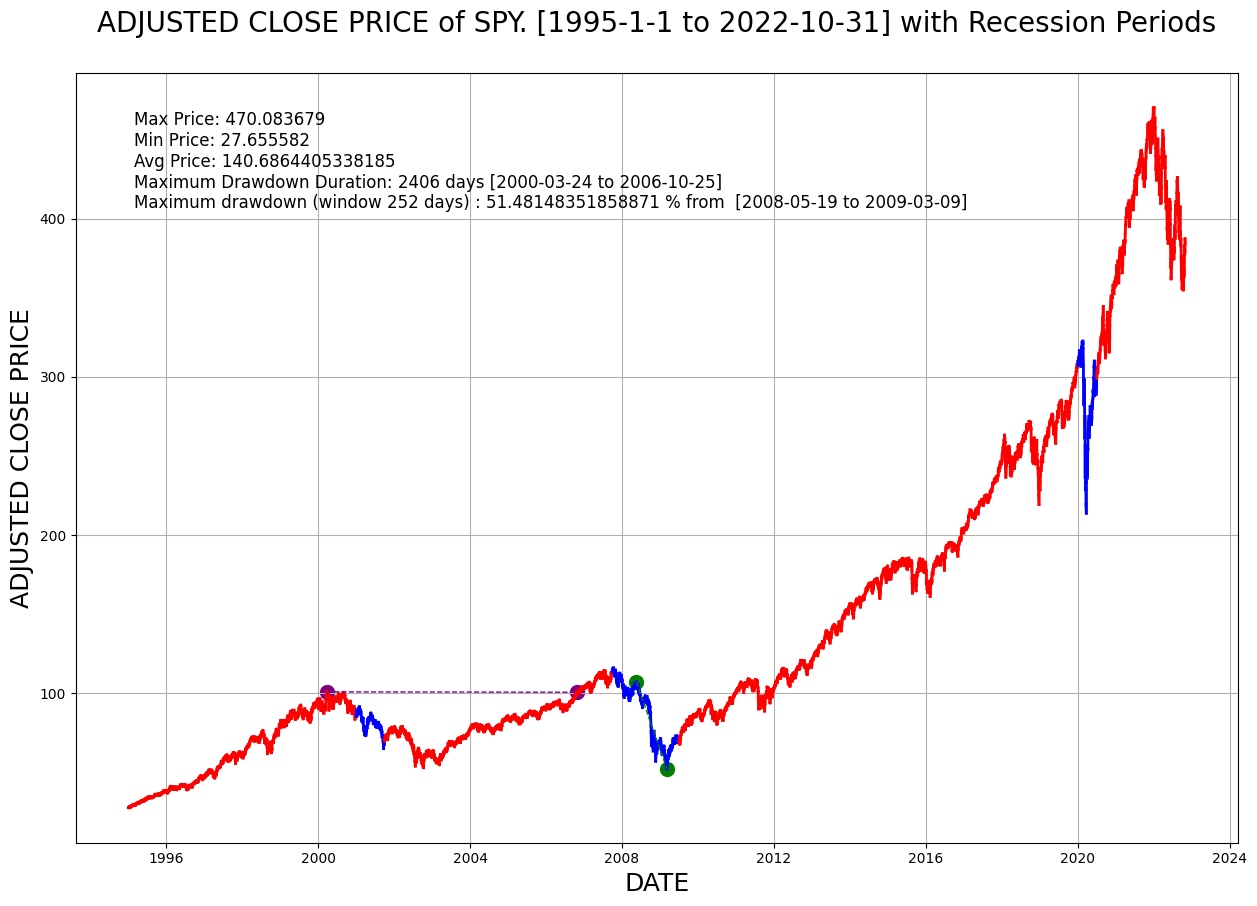

0     1967-10-01
1     1968-01-01
2     1968-04-01
3     1968-07-01
4     1968-10-01
         ...    
341   2022-11-03
342   2022-11-04
343   2022-11-05
344   2022-11-06
345   2022-11-07
Name: Date, Length: 346, dtype: datetime64[ns]


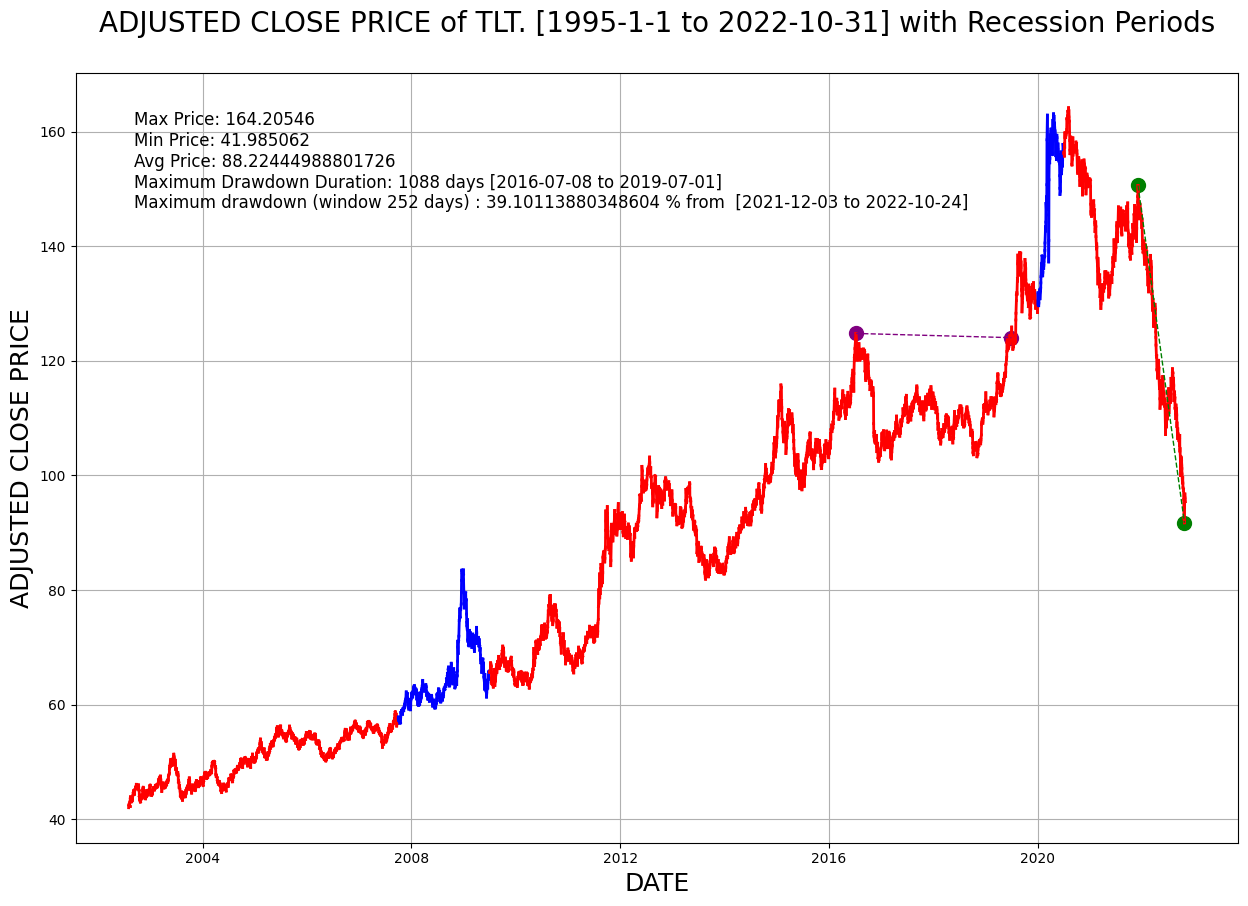

0     1967-10-01
1     1968-01-01
2     1968-04-01
3     1968-07-01
4     1968-10-01
         ...    
341   2022-11-03
342   2022-11-04
343   2022-11-05
344   2022-11-06
345   2022-11-07
Name: Date, Length: 346, dtype: datetime64[ns]


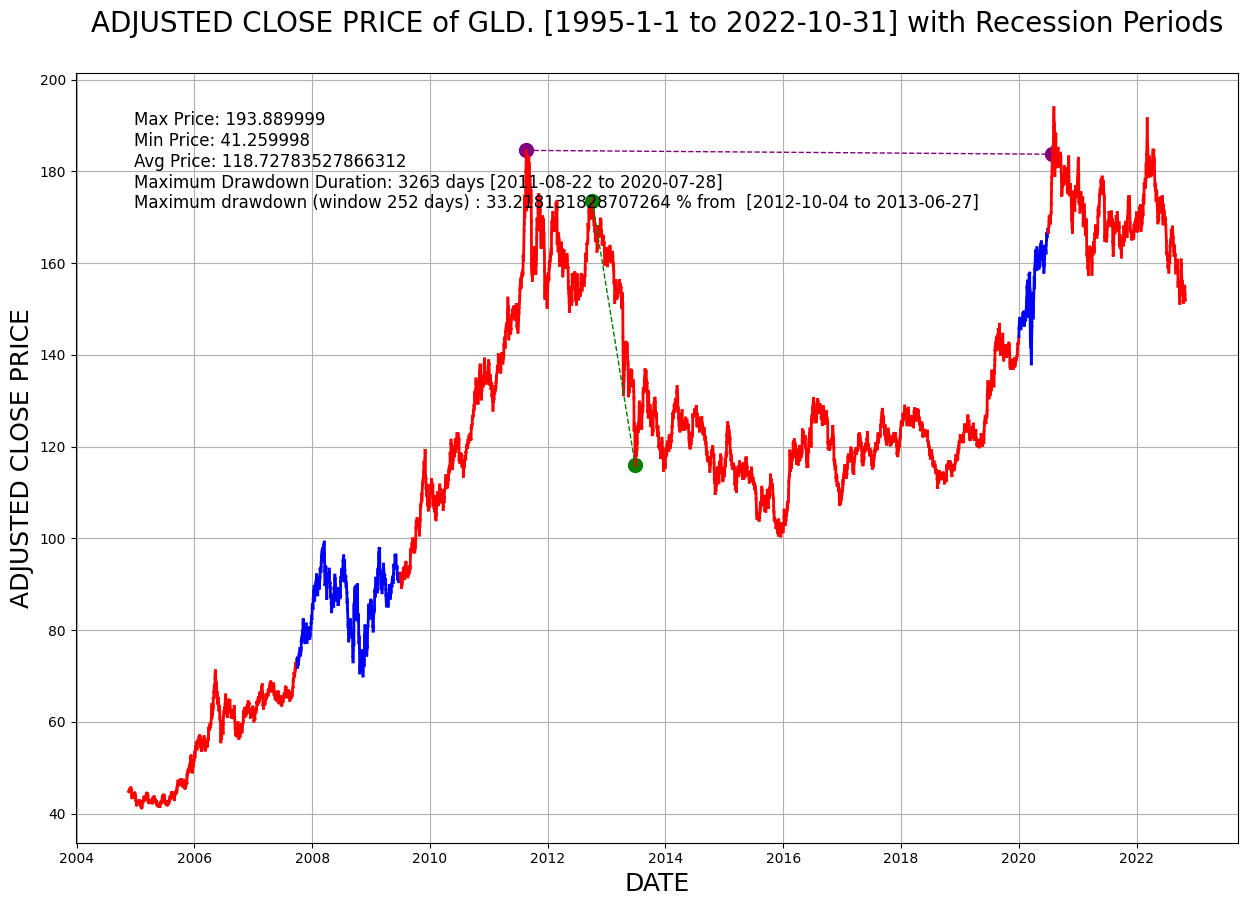

0     1967-10-01
1     1968-01-01
2     1968-04-01
3     1968-07-01
4     1968-10-01
         ...    
341   2022-11-03
342   2022-11-04
343   2022-11-05
344   2022-11-06
345   2022-11-07
Name: Date, Length: 346, dtype: datetime64[ns]


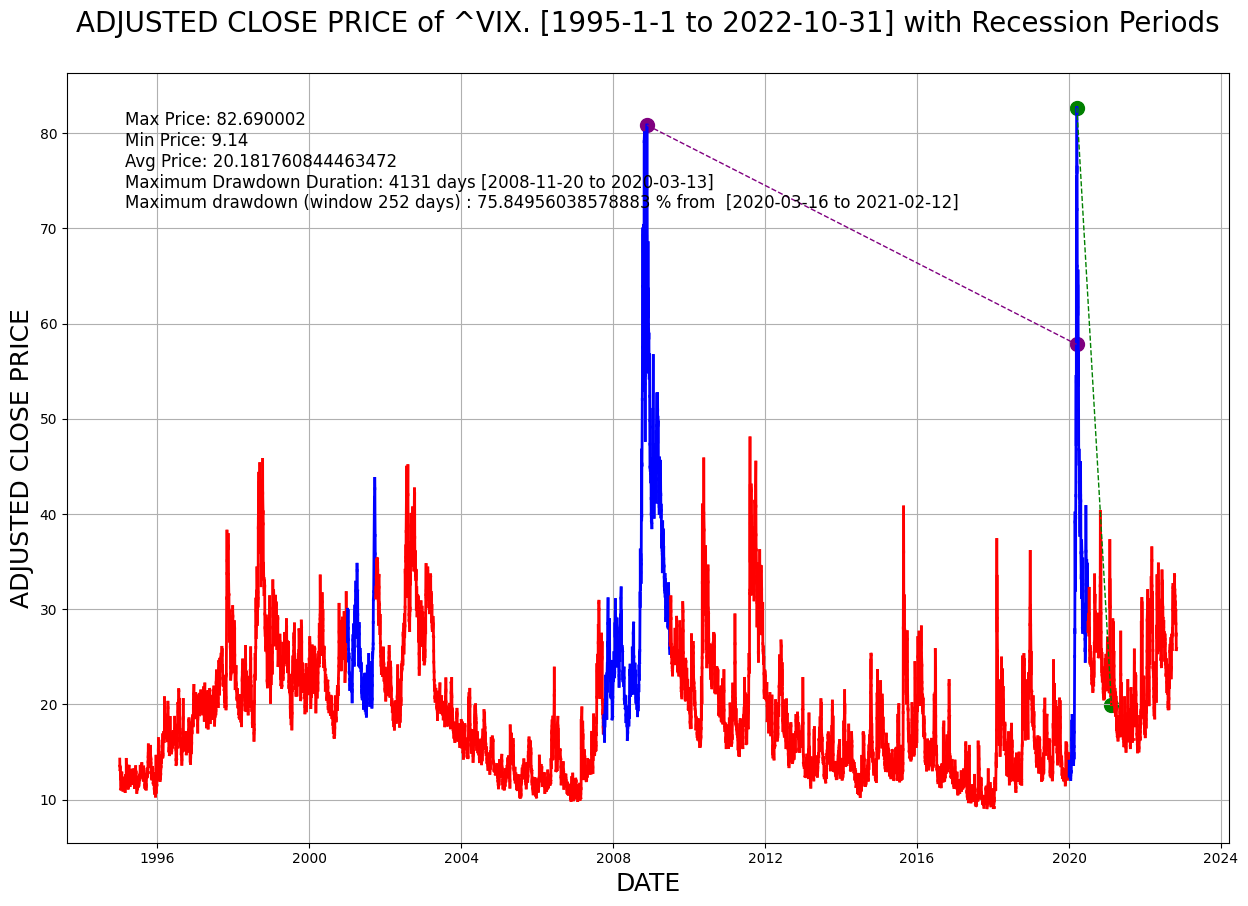

0     1967-10-01
1     1968-01-01
2     1968-04-01
3     1968-07-01
4     1968-10-01
         ...    
341   2022-11-03
342   2022-11-04
343   2022-11-05
344   2022-11-06
345   2022-11-07
Name: Date, Length: 346, dtype: datetime64[ns]


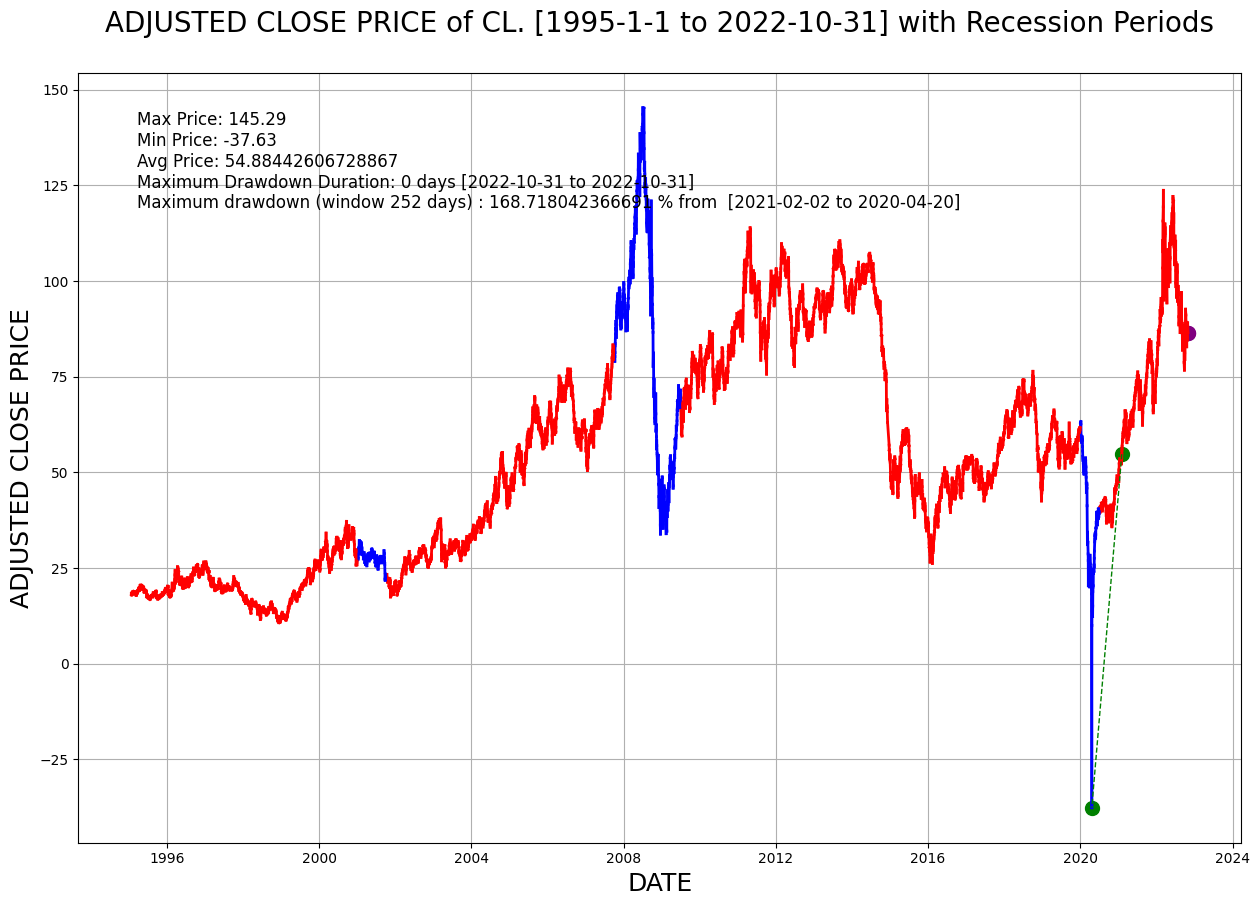

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import accumulate

def plotDataWithRecession(name, starttime, endtime):
    stock_df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    recession_df = pd.read_csv("C:/Users/hsahn/Downloads/recession.csv")

    start_date = pd.to_datetime(starttime,errors='ignore')
    end_date = pd.to_datetime(endtime, errors='ignore')

    stock_df["Date"] = pd.to_datetime(stock_df["Date"], dayfirst=True,errors='ignore')
    recession_df["Date"] = pd.to_datetime(recession_df["Date"], dayfirst=True,errors='ignore')
    print(recession_df["Date"])
    
        
    stock_filtered = (stock_df["Date"] >= start_date) & (stock_df["Date"] <= end_date)
    stock_data = stock_df.loc[stock_filtered].set_index('Date')
    recession_data = recession_df.set_index('Date').resample('D').ffill().loc[start_date:end_date]
    
    fig, ax = plt.subplots(figsize=(15, 10))
    date1, date2, days = DRAWDOWN_DURATION(name, starttime, endtime)
    date3, date4, ddpercent = DRAWDOWN_PERCENT(name, starttime, endtime)
    ax.set_xlabel('DATE', fontsize=18)

    ax.set_ylabel('ADJUSTED CLOSE PRICE', fontsize=18)
    for (i, row1), (_, row2) in zip(stock_data.iterrows(), stock_data.iloc[1:].iterrows()):
        color = 'blue' if recession_data.loc[row1.name, "JHDUSRGDPBR"] else 'red'
        ax.plot([row1.name, row2.name], [row1['Adj Close'], row2['Adj Close']], color=color, linewidth=2)
    plt.title(f'ADJUSTED CLOSE PRICE of {name}. [{starttime} to {endtime}] with Recession Periods\n', fontsize=20, color='black')
    ax.grid(True)

    max_price = stock_data['Adj Close'].max()
    min_price = stock_data['Adj Close'].min()
    avg_price = stock_data['Adj Close'].mean()
    text = "Max Price: " + str(max_price) + "\nMin Price: " + str(min_price) + "\nAvg Price: " + str(
        avg_price) + f"\nMaximum Drawdown Duration: {days} days [{date1.date()} to {date2.date()}]" + f"\nMaximum drawdown (window 252 days) : {ddpercent} % from  [{date3.date()} to {date4.date()}] "

    plt.text(0.05, 0.95, text,
             transform=ax.transAxes, ha='left', va='top', fontsize=12, color='black')

    ax.scatter([date3, date4], [stock_data.loc[date3, 'Adj Close'], stock_data.loc[date4, 'Adj Close']], color='green', marker='o', s=100)

    ax.plot([date3, date4], [stock_data.loc[date3, 'Adj Close'], stock_data.loc[date4, 'Adj Close']], color='green', linestyle='--', linewidth=1)

    ax.scatter([date1, date2], [stock_data.loc[date1, 'Adj Close'], stock_data.loc[date2, 'Adj Close']], color='purple', marker='o', s=100)

    ax.plot([date1, date2], [stock_data.loc[date1, 'Adj Close'], stock_data.loc[date2, 'Adj Close']], color='purple', linestyle='--', linewidth=1)    
    plt.show()


plotDataWithRecession("SPY",'1995-1-1','2022-10-31')
plotDataWithRecession("TLT",'1995-1-1','2022-10-31')
plotDataWithRecession("GLD",'1995-1-1','2022-10-31')
plotDataWithRecession("^VIX",'1995-1-1','2022-10-31')
plotDataWithRecession("CL",'1995-1-1','2022-10-31')

